In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Ingestion

In [2]:
train_df = pd.read_excel('data/Data_Train.xlsx')
test_df = pd.read_excel('data/Test_set.xlsx')
y_test_df = pd.read_excel('data/Sample_submission.xlsx')
test_data = pd.concat([test_df, y_test_df], axis = 1)
df = pd.concat([train_df, test_data], axis = 0)

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Pre Data-Understanding

In [4]:
df.shape

(13354, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Date_of_Journey  13354 non-null  object
 2   Source           13354 non-null  object
 3   Destination      13354 non-null  object
 4   Route            13353 non-null  object
 5   Dep_Time         13354 non-null  object
 6   Arrival_Time     13354 non-null  object
 7   Duration         13354 non-null  object
 8   Total_Stops      13353 non-null  object
 9   Additional_Info  13354 non-null  object
 10  Price            13354 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
# There is only one sample in the whole dataset which has null value. So we can remove this single row.
df.dropna(axis = 0, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13353 non-null  object
 1   Date_of_Journey  13353 non-null  object
 2   Source           13353 non-null  object
 3   Destination      13353 non-null  object
 4   Route            13353 non-null  object
 5   Dep_Time         13353 non-null  object
 6   Arrival_Time     13353 non-null  object
 7   Duration         13353 non-null  object
 8   Total_Stops      13353 non-null  object
 9   Additional_Info  13353 non-null  object
 10  Price            13353 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


# Target Feature (Price) Analysis

Text(0.5, 1.0, 'Price Hist Plot')

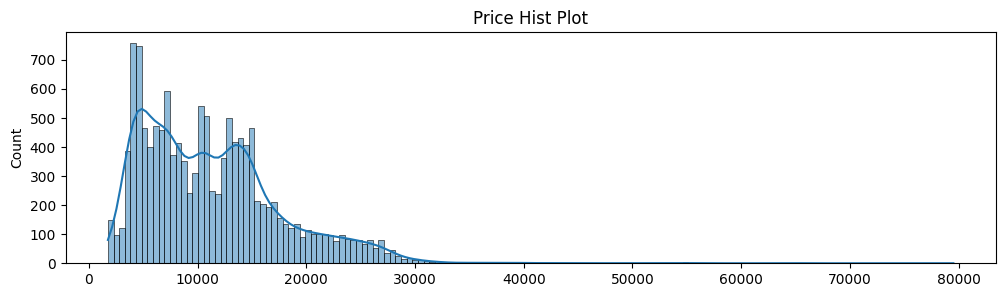

In [10]:
fig = plt.subplots(figsize = (12,3))
sns.histplot(df['Price'].values, bins = 150, kde = True)
plt.title('Price Hist Plot')


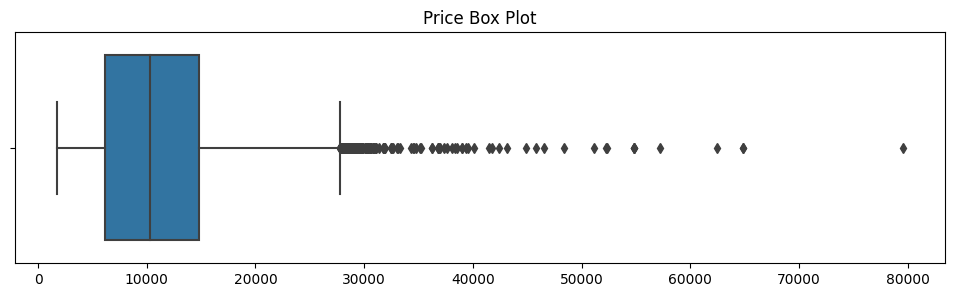

In [11]:
fig = plt.subplots(figsize = (12,3))
sns.boxplot(x = df["Price"].values)
plt.title('Price Box Plot')
plt.show()

In [12]:
df[['Price']].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,13353.0,11302.006216,6452.999958,1759.0,6135.0,10262.0,14781.0,79512.0


##### The histogram and Box plot clearly tells that the graphs are rightly skewed due to the presence of huge number of outliers (30k to 80k price points).

In [13]:
# Determining the number of data points with outliers
Q1 = np.percentile(df['Price'], 25)
Q3 = np.percentile(df['Price'], 75)

#Inter-quartile range
IQR = Q3-Q1
lower_boundary = Q1 - (1.5*IQR)
upper_boundary = Q3 + (1.5*IQR)
outliers_num = len(df[(df['Price']<lower_boundary) | (df['Price']>upper_boundary)])
outliers_num

183

In [14]:
# Dataset with no outliers
df_no_out = df[(lower_boundary < df['Price']) & (df['Price']<upper_boundary)]

In [15]:
df_no_out[['Price']].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,13169.0,11003.020427,5902.54207,1759.0,6111.0,10262.0,14686.0,27730.0


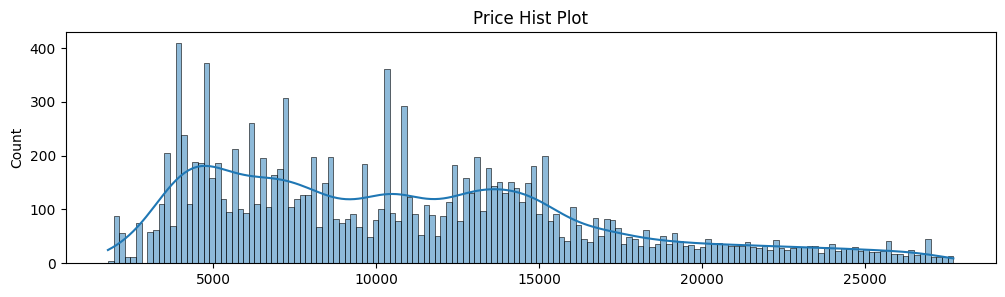

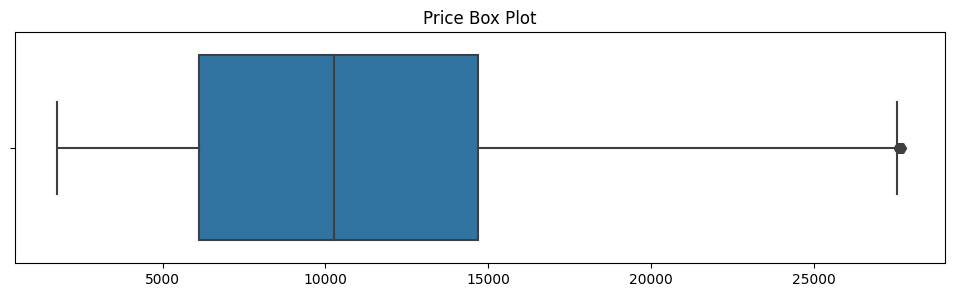

In [16]:
fig = plt.subplots(figsize = (12,3))
sns.histplot(df_no_out['Price'].values, bins = 150, kde = True)
plt.title('Price Hist Plot')

fig = plt.subplots(figsize = (12,3))
sns.boxplot(x = df_no_out["Price"].values)
plt.title('Price Box Plot')
plt.show()

In [17]:
df_no_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13169 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13169 non-null  object
 1   Date_of_Journey  13169 non-null  object
 2   Source           13169 non-null  object
 3   Destination      13169 non-null  object
 4   Route            13169 non-null  object
 5   Dep_Time         13169 non-null  object
 6   Arrival_Time     13169 non-null  object
 7   Duration         13169 non-null  object
 8   Total_Stops      13169 non-null  object
 9   Additional_Info  13169 non-null  object
 10  Price            13169 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


##### We need to transform the categorical data into numerical data

In [18]:
# Analyzing the unique values in each feature
details = {}
for col in df_no_out.columns.tolist():
    if col not in ['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Price']:
        details[col] = df_no_out[col].unique()


In [19]:
details

{'Airline': array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
        'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
        'Vistara Premium economy', 'Multiple carriers Premium economy',
        'Trujet', 'Jet Airways Business'], dtype=object),
 'Source': array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object),
 'Destination': array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
       dtype=object),
 'Total_Stops': array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
       dtype=object),
 'Additional_Info': array(['No info', 'In-flight meal not included',
        'No check-in baggage included', '1 Short layover', 'No Info',
        '1 Long layover', 'Change airports', 'Red-eye flight',
        '2 Long layover', 'Business class'], dtype=object)}

Here Airline is a nominal categorical data with no inherent ranking among the values. So we use OneHOtEncoder here. We can covert the duration from `HH:MM` format to `MMMM` minutes.
Also Total_Stops and Routes are linked together.

We can convert the Dates from `Object` datatype to `DateandTime` dtype.

In [20]:
# Transforming the datatypes of Dates
df_feat = df_no_out.copy(deep = True)


In [21]:
df_feat

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544


In [22]:
df_feat.reset_index(inplace = True, drop = True)

In [23]:
df_feat['Date_of_Journey'] = pd.to_datetime(df_feat['Date_of_Journey'], format = '%d/%m/%Y')
df_feat['Week_Day'] = df_feat['Date_of_Journey'].dt.day_name()

In [24]:
df_feat

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Week_Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Wednesday
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Sunday
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Sunday
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
13164,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046,Thursday
13165,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086,Wednesday
13166,Jet Airways,2019-03-06,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720,Wednesday
13167,Air India,2019-03-06,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544,Wednesday


In [25]:
# Transforming Dep_time
df_feat['Dep_Time'] = pd.to_datetime(df_feat['Dep_Time'], format = '%H:%M').dt.time

In [26]:
df_feat['Arrival_Time'] = df_feat['Arrival_Time'].str.split(' ').str[0]
df_feat['Arrival_Time'] = pd.to_datetime(df_feat['Arrival_Time'], format='%H:%M').dt.time


In [27]:
# Changing Duration feature from HH:MM to total minutes
hour = pd.to_numeric(df_feat['Duration'].str.replace(r'\D+', ' ', regex=True).str.split(' ').str[0])*60
mins = pd.to_numeric(df_feat['Duration'].str.replace(r'\D+', ' ', regex=True).str.split(' ').str[1])

# some rows dont have mins. hence will become NaN if add hr and min columns tgt. 
df_feat['Duration_min'] = np.where(mins.isnull(), hour, hour + mins )


In [28]:
df_feat['Total_Stops'].value_counts()

Total_Stops
1 stop      6940
non-stop    4299
2 stops     1872
3 stops       56
4 stops        2
Name: count, dtype: int64

In [29]:
# Labeling the Total_Stops
stops = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}

In [30]:
df_feat['Total_Stops'] = df_feat['Total_Stops'].map(stops)

In [31]:
# Dropping Route because it is linked with Total_Stops. No need to consider two features having same function
df_feat.drop(['Route'], inplace = True, axis = 1)

df_feat.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Week_Day,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20:00,01:10:00,2h 50m,0,No info,3897,Sunday,170.0
1,Air India,2019-05-01,Kolkata,Banglore,05:50:00,13:15:00,7h 25m,2,No info,7662,Wednesday,445.0
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25:00,04:25:00,19h,2,No info,13882,Sunday,1140.0
3,IndiGo,2019-05-12,Kolkata,Banglore,18:05:00,23:30:00,5h 25m,1,No info,6218,Sunday,325.0
4,IndiGo,2019-03-01,Banglore,New Delhi,16:50:00,21:35:00,4h 45m,1,No info,13302,Friday,285.0


# EDA
### Transaction Count and Price

In [32]:
airline_price_stats = df_feat.groupby('Airline')['Price'].describe()
airline_price_stats.sort_values(by=['count'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways,4676.0,12934.129170,4922.532197,1840.0,10031.0,12898.0,15129.00,27622.0
IndiGo,2532.0,8289.616904,6065.297053,2227.0,4591.0,5894.5,8568.75,27714.0
Air India,2167.0,11541.985233,5554.268938,2050.0,7480.0,10703.0,14216.50,27722.0
Multiple carriers,1518.0,12656.053360,5004.545430,5797.0,8266.0,12192.0,15275.25,27689.0
SpiceJet,1016.0,7320.629921,6570.055943,1759.0,3625.0,3971.0,7295.00,27730.0
Vistara,600.0,10230.761667,5767.508157,3687.0,5613.0,8610.0,12395.00,27674.0
Air Asia,398.0,8302.183417,6037.654910,3383.0,4409.0,5645.0,8759.00,26627.0
GoAir,238.0,8443.844538,6206.392264,3398.0,4239.0,5842.0,9069.00,26467.0
Multiple carriers Premium economy,16.0,12685.437500,3333.582557,9845.0,10161.0,11269.0,14629.00,21665.0


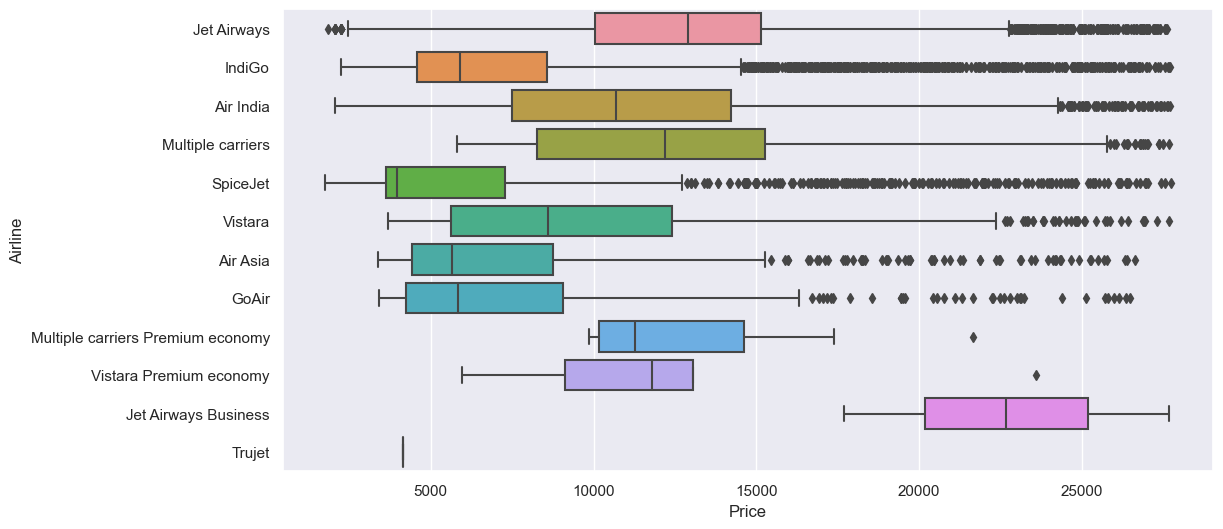

In [33]:
airline_order = airline_price_stats.sort_values(by=['count'], ascending=False).index
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(data=df_feat, x="Price", y="Airline",order=airline_order)
plt.show()

- Differences in price points among the different airlines can be onbserved.
- Espically IndiGo and SpiceJet that has significantly lower prices.
- We can observe that the more expensive prices are from the Business and Premium Airlines but also with little data on them

### Total_Stops and Price

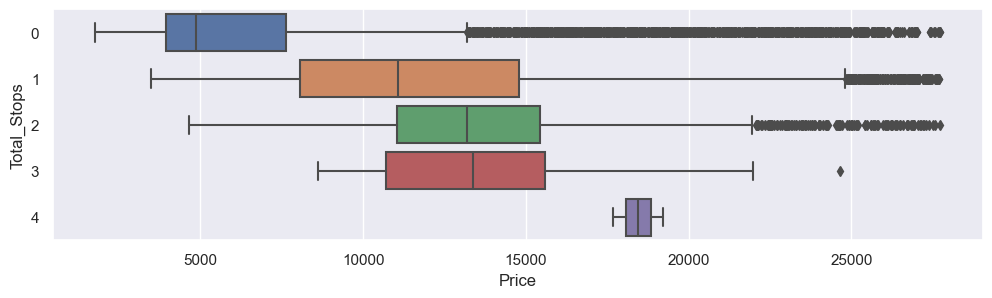

In [34]:
sns.set(rc={'figure.figsize':(12,3)})
sns.boxplot(data=df_feat, x="Price", y=df_feat["Total_Stops"].astype('string'), order=['0', '1', '2', '3', '4'])
plt.show()

- Clearly direct flights with 0 stops are significantly cheaper.
- We can also observe that the more number of stops, the more expensive the flight price is.

### Correlation between Duration and Price

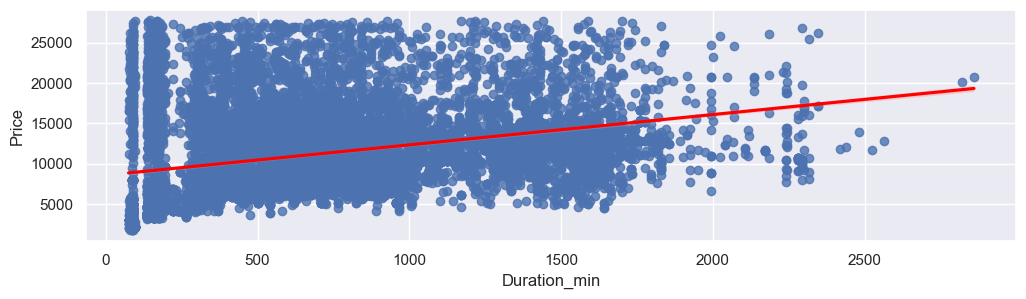

In [35]:
sns.regplot(data=df_feat, x='Duration_min', y='Price',
            line_kws = {"color": "red"})
plt.show()

- We do see a slight positive correlation between flight duration and price.
- Outliers above 27k were not considered in this analysis.

In [36]:
df_feat['Additional_Info'].value_counts(normalize=True)

Additional_Info
No info                         0.785785
In-flight meal not included     0.182246
No check-in baggage included    0.029767
1 Long layover                  0.001063
Change airports                 0.000607
No Info                         0.000228
1 Short layover                 0.000076
Red-eye flight                  0.000076
2 Long layover                  0.000076
Business class                  0.000076
Name: proportion, dtype: float64

Here 'No Info' covers 78.6% of data. 'In-flight meal not included' covers approximately remaining 18.22% of data. Thus they both together cover the 97% datapoints.

### Correlation Between Additional Data and Price

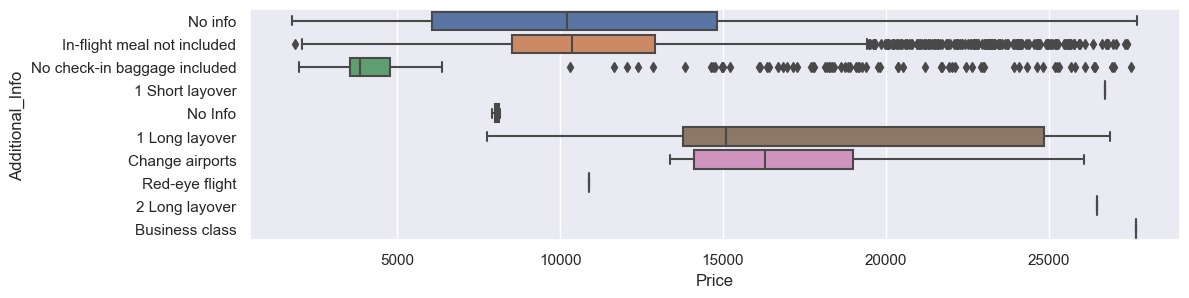

In [37]:
sns.boxplot(data = df_feat, x = 'Price', y = 'Additional_Info')
plt.show()

Here 'No Info' and 'In-flight meals not provided' has not much effect on Price, as they both have approximately the same medians. So we can drop this whole column as it is of no such use here. 

We can also drop the specific dates and times columns. There may be a correlation between weekdays and price. So we will check for it.


In [38]:
df_feat.drop(labels = ['Date_of_Journey', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time'], inplace = True, axis = 1)

In [39]:
df_feat.drop_duplicates(inplace = True)

In [40]:
df_feat.drop('Additional_Info', axis = 1, inplace = True)

In [41]:
df_feat.dtypes

Airline          object
Duration         object
Total_Stops       int64
Price             int64
Week_Day         object
Duration_min    float64
dtype: object

Now only airlines feature is remaining. W will do One hot encoding here.

In [42]:
df_feat.head()


,Airline,Duration,Total_Stops,Price,Week_Day,Duration_min
0,IndiGo,2h 50m,0,3897,Sunday,170.0
1,Air India,7h 25m,2,7662,Wednesday,445.0
2,Jet Airways,19h,2,13882,Sunday,1140.0
3,IndiGo,5h 25m,1,6218,Sunday,325.0
4,IndiGo,4h 45m,1,13302,Friday,285.0


In [43]:
df_feat.drop('Duration', axis = 1, inplace = True)

In [49]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [56]:
df_feat = pd.concat([df_feat, pd.DataFrame(ohe.fit_transform(df_feat['Airline'].values.reshape(-1,1)).toarray(), columns = ohe.get_feature_names_out()), 
                    pd.DataFrame(ohe.fit_transform(df_feat['Week_Day'].values.reshape(-1,1)).toarray(), columns = ohe.get_feature_names_out())], axis = 1)

In [57]:
df_feat.head()

,Airline,Total_Stops,Price,Week_Day,Duration_min,x0_Air Asia,x0_Air India,x0_GoAir,x0_IndiGo,x0_Jet Airways,...,x0_Trujet,x0_Vistara,x0_Vistara Premium economy,x0_Friday,x0_Monday,x0_Saturday,x0_Sunday,x0_Thursday,x0_Tuesday,x0_Wednesday
0,IndiGo,0.0,3897.0,Sunday,170.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Air India,2.0,7662.0,Wednesday,445.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Jet Airways,2.0,13882.0,Sunday,1140.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,IndiGo,1.0,6218.0,Sunday,325.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,IndiGo,1.0,13302.0,Friday,285.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
df_feat.drop(['Airline', 'Week_Day'], inplace=True, axis = 1)

In [61]:
df_feat

,Total_Stops,Price,Duration_min,x0_Air Asia,x0_Air India,x0_GoAir,x0_IndiGo,x0_Jet Airways,x0_Jet Airways Business,x0_Multiple carriers,...,x0_Trujet,x0_Vistara,x0_Vistara Premium economy,x0_Friday,x0_Monday,x0_Saturday,x0_Sunday,x0_Thursday,x0_Tuesday,x0_Wednesday
0,0.0,3897.0,170.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,7662.0,445.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,13882.0,1140.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,6218.0,325.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,13302.0,285.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10504,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10508,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10510,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10511,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
